<a href="https://cognitiveclass.ai/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0321EN-SkillsNetwork/image/IDSN-logo.png" width="400"> </a>


# Part 2: Concrete Crack Image Classification — Data preparation

**Short description:**  
This notebook extracts the concrete crack image dataset, creates an ImageDataGenerator, reads the first batches and displays sample images. It demonstrates basic image extraction and preview steps used in image classification pipelines.

**Dataset:**

Download the dataset from: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week2.zip

**Objectives**
- Extract the zipped dataset and create a working directory  with `zipfile`.
- Instantiate `ImageDataGenerator` and create directory-based generators.
- Read and inspect the first batch of images and labels.
- Visualize a small grid of image samples to confirm correct loading and preprocessing.

**Notice about documentation:**  
The original notebook submission (course assignment) was kept intact. I have **only modified documentation (comments, headings, markdown)** and made **minimal, necessary corrections** to ensure the notebook runs without errors. All rights related to the lab/workshop design and original exercise belong exclusively to **IBM Corporation**. This notebook includes additional documentation for clarity, but the intellectual property of the original exercise is retained by IBM.

---

## Table of contents

1. Dependencies & execution instructions  
2. Unzip dataset and inspect extraction folder  
3. Create ImageDataGenerator and directory flow  
4. Read first batch and inspect images & labels  
5. Visualize the first batch in a 2×2 grid  
6. Notes & next steps


## 1) Dependencies & execution instructions

This section installs and imports required Python packages.  

**Recommended local execution steps:**

1. Create and activate a Python virtual environment:
   - `python -m venv venv`
   - `source venv/bin/activate` (macOS / Linux) or `venv\Scripts\activate` (Windows)
2. Install dependencies:
   - `pip install -r requirements.txt`
3. Launch Jupyter Notebook:
   - `jupyter notebook`
4. Open this notebook and run cells top-to-bottom.

**Note:** Make sure to have the `concrete_data_week2.zip` in the root directory.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
from pathlib import Path

## 2) Unzip dataset and inspect extraction folder

Extracts `concrete_data_week2.zip` into `concrete_data_week2/` and verify the dataset folder contains image subfolders such as `Negative` and `Positive`.


In [3]:
zip_path = Path("concrete_data_week2.zip")

extract_dir = Path("concrete_data_week2")
extract_dir.mkdir(exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_dir)

**Important Note:**

There are thousands and thousands of images in each folder, so please don't attempt to double click on the *Negative* and *Positive* folders. This may consume all of your memory and you may end up with a **50** error. So please **DO NOT DO IT**.


In [4]:
os.listdir('concrete_data_week2')

['concrete_data_week2', '__MACOSX']

## 3) Create ImageDataGenerator and directory flow

Instantiate `ImageDataGenerator` (optionally with `rescale`) and use `flow_from_directory()` to create a generator that yields image batches and one-hot categorical labels.

In [5]:
dataset_dir = './concrete_data_week2/concrete_data_week2'

#### Standard ImageDataGenerator


In [13]:
# instantiate image data generator
data_generator_std = ImageDataGenerator()

Use the <code>flow_from_directory</code> methods to loop through the images in batches.

In [14]:
image_generator_std = data_generator_std.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 40000 images belonging to 2 classes.


#### Custom ImageDataGenerator


Transformations like scaling, rotations, and flips, can be applied to the images when the ImageDataGenerator object is defined. For instance, normalization can be defined as follows:


In [15]:
# instantiate image data generator
data_generator_cust = ImageDataGenerator(
    rescale=1./255
)

In [16]:
image_generator_cust = data_generator_cust.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 40000 images belonging to 2 classes.


The values are not integers anymore, but scaled resolution values since the original number is divided by 255.


## 4) Read first batch and inspect images & labels

Use `.next()` on the generator to obtain a batch (images and labels). Inspect `first_batch_images` and `first_batch_labels` arrays to confirm shapes and data types.

Use the <code>next</code> method to access the batches.


In [17]:
first_batch = image_generator_std[0]

In [20]:
first_batch_images = image_generator_std[0][0]

In [19]:
first_batch_labels = image_generator_std[0][1]
first_batch_labels

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

## 5) Visualize the first batch in a 2×2 grid

Plot the four images from the first batch using Matplotlib subplots, convert image arrays to `uint8` if necessary for display.

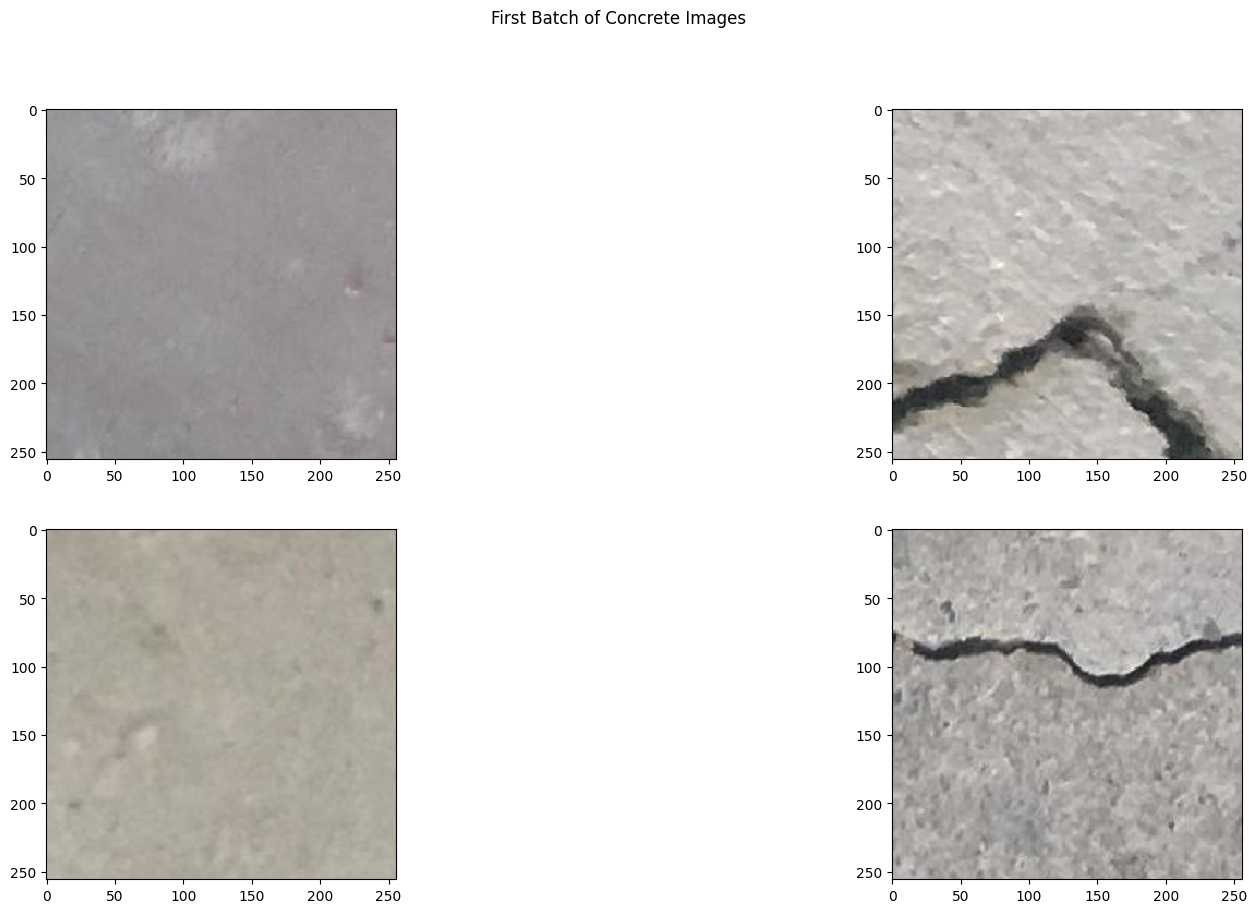

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = first_batch_images[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()

Batches are sampled randomly from the data.


## 6) Notes & reproducibility

- `flow_from_directory()` expects a directory structure where subfolders represent class names.
- If you plan to load all images into memory, ensure enough RAM; otherwise use generators or on-disk batching.


## About the Authors:

 [Alex Aklson](https://www.linkedin.com/in/aklson/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01)


This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week2_LAB1).



## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-18  | 2.0  | Shubham  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_medium=dswb&utm_source=bducopyrightlink&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01).
